In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

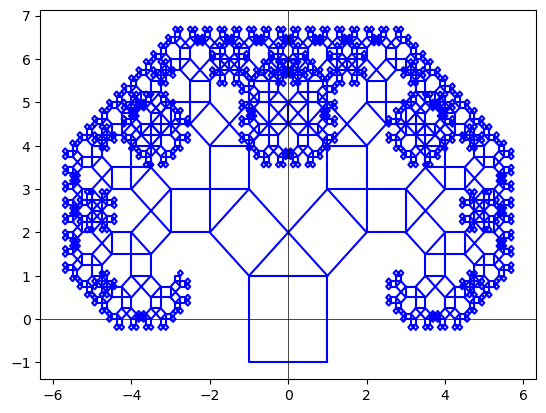

In [54]:
def calc_diff(start, finish):
    # Calculate and return the vector difference
    return finish - start

start_points = torch.tensor([[1, -1],
                             [-1, -1],
                             [-1, 1],
                             [1, 1],
                             [1, -1]], dtype=torch.float32)  # Ensure the square is closed

angle = np.pi / 4
clk_rotation_matrix = torch.tensor([[np.cos(angle), np.sin(angle)],
                                    [-np.sin(angle), np.cos(angle)]], dtype=torch.float32)

anti_clk_rotation_matrix = torch.tensor([[np.cos(angle), -np.sin(angle)],
                                    [np.sin(angle), np.cos(angle)]], dtype=torch.float32)

current_points = start_points

x = current_points[:, 0]
y = current_points[:, 1]
plt.plot(x, y, 'b-')

def left_square(current_points):
    rotated_points = torch.matmul(current_points, clk_rotation_matrix)
    rotated_points /= np.sqrt(2)  # Scale down the points
    x_delta, y_delta = calc_diff(current_points[2], rotated_points[1])  # Translation vector

    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    plt.plot(x, y, 'b-')
    return rotated_points


def right_square(current_points):
    rotated_points = torch.matmul(current_points, anti_clk_rotation_matrix)
    rotated_points /= np.sqrt(2)  # Scale down the points
    x_delta, y_delta = calc_diff(current_points[3], rotated_points[0])  # Translation vector

    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    plt.plot(x, y, 'b-')
    return rotated_points

binary_tree = []
binary_tree.append(start_points)
for i in range(2,1023):
    if i%2 ==0:
        index = int((i/2)-1)
        binary_tree.append(right_square(binary_tree[index]))
    if i%2 !=0:
        index = int(((i-1)/2)-1)
        binary_tree.append(left_square(binary_tree[index])) 

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()